# 0.8_ss_chap6_activation
- activation層の中身をみて行く　

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%reload_ext autoreload

In [4]:
from src import utils
import itertools
import logging
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
from collections import OrderedDict
%matplotlib inline

In [56]:
log_fmt = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
logging.basicConfig(level=logging.INFO, format=log_fmt)
# logging.basicConfig(level=logging.DEBUG, format=log_fmt)
logger = logging.getLogger()

## Activation

In [5]:
from src.ch06.weight_init_activation_histogram import main

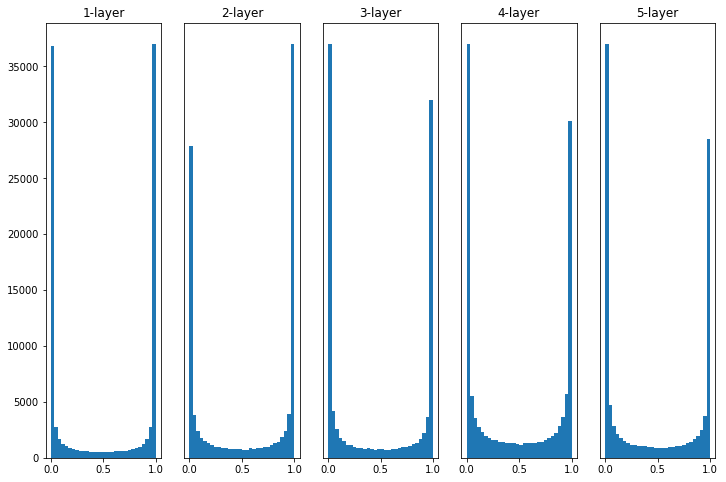

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
main()

## Functions

### Activation

In [22]:
def sigmoid(x):
        return 1 / (1 + np.exp(-x))

In [81]:
def Relu(x):
        return np.maximum(0, x)

In [82]:
def tanh(x):
        return np.tanh(x)

In [88]:
activation_funcs = [sigmoid, Relu, tanh]

### Weight

In [69]:
def identity(x):
        return 1

In [109]:
def one_tenth(x):
        return .1

In [84]:
def one_percent(x):
        return 0.01

In [126]:
def xavier(x):
        return np.sqrt(1./x)

In [127]:
def he(x):
        return np.sqrt(2./x)

In [128]:
weight_funcs = [identity, one_percent, xavier, he]

## 書いてみよう

In [8]:
# 初期化
# 1000 * 100 のデータ
input_data = np.random.randn(1000, 100)
x = input_data
node_num = 100
hidden_layer_size=5

In [9]:
activations = {}

In [26]:
for i in range(hidden_layer_size):
        if i != 0:
                x = activations[i-1]
        # 100 * 100 の乱数　
        w = np.random.randn(node_num, node_num) * 1
        
        # 重みと入力を演算
        a = np.dot(x, w)
        
        # 活性化させる
        z = sigmoid(a)

        # 値を保存
        activations[i] = z

## 関数化する
- ラップするのは、w の重みと、活性化関数　

In [28]:
def get_activation_weights(activation_func, weight_func, 
                       input_size=1000, node_num=100, 
                       hidden_layer_size=5):
        ''' 活性化関数の中身をみて行く
        
        Parameters
        ---------
        activation_func: function
                活性化関数
        weight_func: function
                重みの関数. node_numを引数に取る．
        input_size: int
                入力層の数
        node_num: int
                隠れ層のニューロン数　
        hidden_layer_size: int
                層の厚さ
        '''
        #　初期化
        activations = {}
        x = np.random.randn(input_size, node_num)
        
        # 隠れ層の中を、伝播して行く　
        for i in range(hidden_layer_size):
                if i != 0:
                        x = activations[i-1]
                # 100 * 100 の乱数　
                w_init = np.random.randn(node_num, node_num)
                # ここでそのまま、0.01, sqrt等色々試す
                w = w_init * weight_func(node_num)

                # 重みと入力を演算
                a = np.dot(x, w)

                # 活性化させる
                z = activation_func(a)

                # 値を保存
                activations[i] = z
        
        return activations

In [94]:
activations = get_activation_weights(sigmoid, identity)

## Plot

In [91]:
activation_func = sigmoid

In [92]:
weight_func = identity 

In [101]:
def plot_activations(activations, activation_func=None, weight_func=None):
        fig, ax = plt.subplots(figsize=(4*1.8, 4))
        for i, a in activations.items():
                plt.subplot(1, len(activations), i+1)
                plt.title(f"{i+1} layer")
                if i != 0:
                        plt.yticks([], [])
                plt.hist(a.flatten(), 30, range=(0,1))
        
        # set super title
        suptitle = f"activation: {activation_func.__name__}"
        suptitle += f", weight: {weight_func.__name__}"
        fig.suptitle(suptitle)

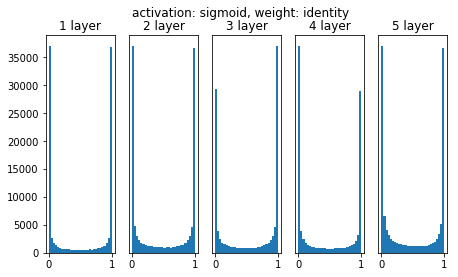

In [102]:
plot_activations(activations, activation_func, weight_func)

# For loop

In [103]:
import itertools

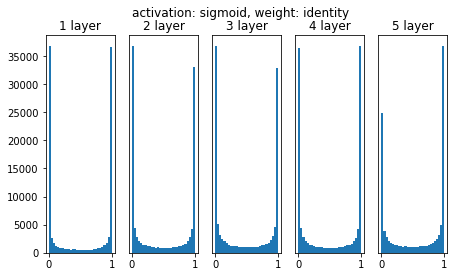

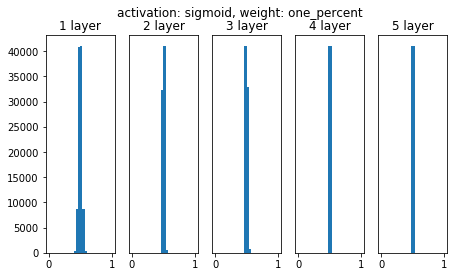

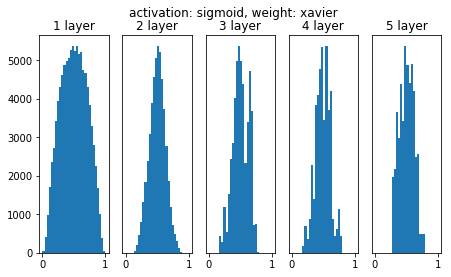

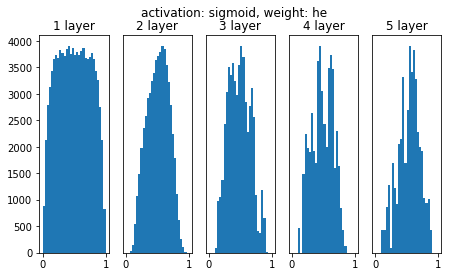

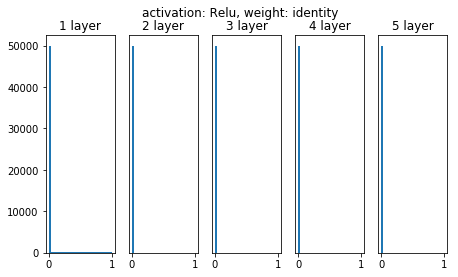

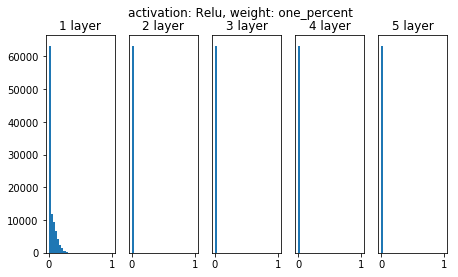

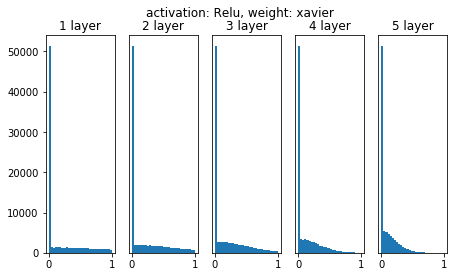

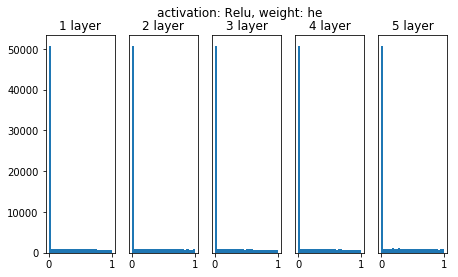

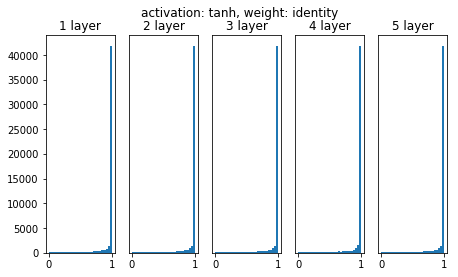

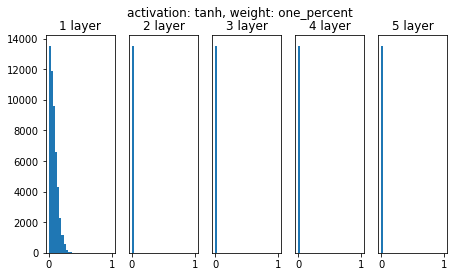

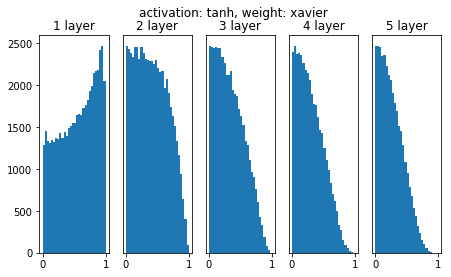

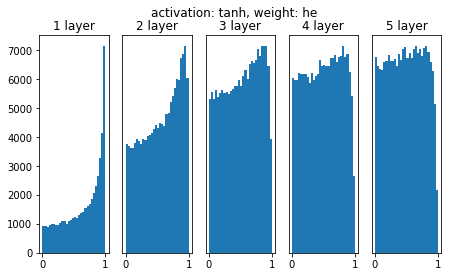

In [129]:
for activation_func, weight_func in \
        itertools.product(activation_funcs, weight_funcs):
        activations = get_activation_weights(activation_func, 
                                            weight_func)
        
        plot_activations(activations, activation_func, weight_func)

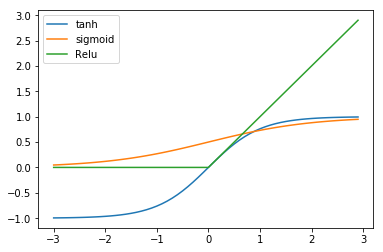

In [119]:
x = np.arange(-3, 3, .1)
plt.plot(x, tanh(x), label='tanh')
plt.plot(x, sigmoid(x), label='sigmoid')
plt.plot(x, Relu(x), label='Relu')
plt.legend()